**Considere la siguiente transformación de coordenadas _cardióidicas_**

$$x=\frac{u^2-v^2}{2(u^2+v^2)^2} \qquad y=\frac{uv}{2(u^2+v^2)^2} \qquad z=w$$

**Considere además un campo tensorial y un vector en coordenadas cartesianas:**

$$R^i_j(x,y,z)=\begin{pmatrix} \frac{x}{2} & 1 & \frac{zx}{2}\\ 1 & y & 3y\\ \frac{zx}{2} & 3y & \frac{9z}{2}\end{pmatrix}, \qquad t^i=\begin{pmatrix} \frac{1}{3}\\ \frac{2}{3}\\ 1\end{pmatrix}$$

Importamos los paquetes necesarios

In [2]:
from sympy import * 
from sympy.vector import CoordSys3D, Del
init_printing(pretty_print=True)

Declaramos primero las variables a usar

In [3]:
N=CoordSys3D('N')
u,v,w=symbols('u v w')
x=(u**2-v**2)/(2*(u**2+v**2)**2)
y=(u*v)/(2*(u**2+v**2)**2)
z=w
Tensor=Matrix([[x/2,1,z*x/2],[1,y,3*y],[z*x/2,3*y,9*z/2]])
T=(1/3)*N.i+(2/3)*N.j+N.k

**1. Encuentre los vectores base para esta ley de transformación y compruebe si son ortogonales o no.**

Hallamos el vector posición para el nuevo sistema de coordenadas

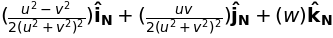

In [10]:
r=x*N.i+y*N.j+z*N.k
r

Determinamos los vectores base

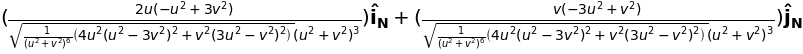

In [10]:
dr_du=diff(r,u)
e_u=simplify(dr_du.normalize())
e_u

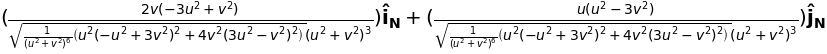

In [11]:
dr_dv=diff(r,v)
e_v=simplify(dr_dv.normalize())
e_v

In [12]:
dr_dw=diff(r,w)
e_w=simplify(dr_dw.normalize())
e_w

Analizamos su ortogonalidad

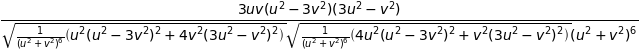

In [29]:
simplify(e_u.dot(e_v))

In [25]:
e_u.dot(e_w)

In [26]:
e_v.dot(e_w)

No son ortogonales puesto que $e_u\cdot e_v=e_v\cdot e_u\neq 0$.

**2. Encuentre la expresión del campo tensorial en las coordenadas cardióidicas.**

Encontramos primero la matriz de cambio de coordenadas 

In [4]:
partial_x=[diff(x,u),diff(x,v),diff(x,w)]
partial_y=[diff(y,u),diff(y,v),diff(y,w)]
partial_z=[diff(z,u),diff(z,v),diff(z,w)]
Matriz=simplify(Matrix([partial_x,partial_y,partial_z]))
Matriz

⎡  ⎛   2      2⎞    ⎛     2    2⎞   ⎤
⎢u⋅⎝- u  + 3⋅v ⎠  v⋅⎝- 3⋅u  + v ⎠   ⎥
⎢───────────────  ───────────────  0⎥
⎢            3                3     ⎥
⎢   ⎛ 2    2⎞        ⎛ 2    2⎞      ⎥
⎢   ⎝u  + v ⎠        ⎝u  + v ⎠      ⎥
⎢                                   ⎥
⎢  ⎛     2    2⎞     ⎛ 2      2⎞    ⎥
⎢v⋅⎝- 3⋅u  + v ⎠   u⋅⎝u  - 3⋅v ⎠    ⎥
⎢───────────────   ─────────────   0⎥
⎢             3                3    ⎥
⎢    ⎛ 2    2⎞        ⎛ 2    2⎞     ⎥
⎢  2⋅⎝u  + v ⎠      2⋅⎝u  + v ⎠     ⎥
⎢                                   ⎥
⎣       0                0         1⎦

Encontramos la matriz inversa a la matriz de cambio

In [36]:
Inv_Matriz=simplify(Matriz**-1)
Inv_Matriz

⎡  ⎛   2      2⎞      ⎛     2    2⎞   ⎤
⎢u⋅⎝- u  + 3⋅v ⎠  2⋅v⋅⎝- 3⋅u  + v ⎠  0⎥
⎢                                     ⎥
⎢  ⎛     2    2⎞       ⎛ 2      2⎞    ⎥
⎢v⋅⎝- 3⋅u  + v ⎠   2⋅u⋅⎝u  - 3⋅v ⎠   0⎥
⎢                                     ⎥
⎣       0                 0          1⎦

Realizamos la operación matricial respectiva para encontrar la expresión buscada

In [24]:
R=simplify(Inv_Matriz*Tensor*Matriz)
R

⎡   ⎛                ⎛                                      2⎞               ⎛
⎢   ⎜    ⎛   2    2⎞ ⎜ 2 ⎛   2    2⎞   ⎛ 2      2⎞ ⎛ 2    2⎞ ⎟   ⎛ 2      2⎞ ⎜
⎢ u⋅⎝2⋅v⋅⎝3⋅u  - v ⎠⋅⎝v ⋅⎝3⋅u  - v ⎠ + ⎝u  - 3⋅v ⎠⋅⎝u  + v ⎠ ⎠ + ⎝u  - 3⋅v ⎠⋅⎝
⎢ ────────────────────────────────────────────────────────────────────────────
⎢                                                                       5     
⎢                                                              ⎛ 2    2⎞      
⎢                                                            4⋅⎝u  + v ⎠      
⎢                                                                             
⎢ ⎛              ⎛                         2                          ⎞       
⎢ ⎜  ⎛ 2      2⎞ ⎜    ⎛ 2      2⎞ ⎛ 2    2⎞      ⎛ 2    2⎞ ⎛   2    2⎞⎟      2
⎢-⎝u⋅⎝u  - 3⋅v ⎠⋅⎝8⋅u⋅⎝u  - 3⋅v ⎠⋅⎝u  + v ⎠  - v⋅⎝u  - v ⎠⋅⎝3⋅u  - v ⎠⎠ + 2⋅v 
⎢─────────────────────────────────────────────────────────────────────────────
⎢                                                   

**3. Encuentre el tensor métrico para este sistema de coordenadas**.

Calculamos cada entrada de la matriz que representa el tensor métrico

In [33]:
e_uE=[e_u.dot(e_u),e_u.dot(e_v),e_u.dot(e_w)]
e_vE=[e_v.dot(e_u),e_v.dot(e_v),e_v.dot(e_w)]
e_wE=[e_w.dot(e_u),e_w.dot(e_v),e_w.dot(e_w)]
Metrica=simplify(Matrix([e_uE,e_vE,e_wE]))
Metrica

⎡                                                                             
⎢                                                                             
⎢                                                  1                          
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                          ⎛ 2      

**4. Dados los siguientes campos $\psi(x,y,z)=1-xy$, y $\vec{B}=-y^2|e_x\rangle+x^2|e_y\rangle-z^2|e_z\rangle$.**  
**Calcule:**

**a) Gradiente: $\nabla \psi$**

In [24]:
c_escalar=1-N.x*N.y
delop=Del()
gradiente=delop(c_escalar)
gradiente.doit()

**b) Divergencia: $\nabla \cdot \vec{B}$**

In [26]:
c_vectorial=-(N.y**2)*N.i+(N.x**2)*N.j-(N.z**2)*N.k
delop.dot(c_vectorial).doit()

**c) Rotacional: $\nabla \times \vec{B}$**

In [17]:
delop.cross(c_vectorial).doit()

**d) Derivadas direccionales: $(\nabla \psi)\cdot \vec{t}$ y $(\vec{t}\cdot \nabla)\vec{B}$, donde $\vec{t}$ es el vector cuyas componentes $t^i$ están expuestas arriba.**

Calculemos primero $(\nabla \psi)\cdot \vec{t}$:

In [19]:
(T & delop)(c_escalar)

Calculemos ahora $(\vec{t}\cdot \nabla)\vec{B}$:

In [28]:
(T & delop)(c_vectorial)

**5. Calcule ahora las cantidades arriba para el sistema de coordenadas $(u,v,w)$**

**a) Gradiente: $\nabla \psi$**

In [19]:
grad=simplify(Matriz*Matrix([-y,-x,0]))
grad

⎡  ⎛ 2 ⎛ 2      2⎞   ⎛ 2    2⎞ ⎛   2    2⎞⎞⎤
⎢v⋅⎝u ⋅⎝u  - 3⋅v ⎠ + ⎝u  - v ⎠⋅⎝3⋅u  - v ⎠⎠⎥
⎢──────────────────────────────────────────⎥
⎢                          5               ⎥
⎢                 ⎛ 2    2⎞                ⎥
⎢               2⋅⎝u  + v ⎠                ⎥
⎢                                          ⎥
⎢  ⎛ 2 ⎛   2    2⎞   ⎛ 2      2⎞ ⎛ 2    2⎞⎞⎥
⎢u⋅⎝v ⋅⎝3⋅u  - v ⎠ - ⎝u  - 3⋅v ⎠⋅⎝u  - v ⎠⎠⎥
⎢──────────────────────────────────────────⎥
⎢                          5               ⎥
⎢                 ⎛ 2    2⎞                ⎥
⎢               4⋅⎝u  + v ⎠                ⎥
⎢                                          ⎥
⎣                    0                     ⎦

**b) Divergencia: $\nabla \cdot \vec{B}$**

In [12]:
-2*z

**c) Rotacional: $\nabla \times \vec{B}$**

In [18]:
rot=Matrix([0,0,2*(x+y)])
simplify(Matriz*rot)

⎡      0      ⎤
⎢             ⎥
⎢      0      ⎥
⎢             ⎥
⎢ 2          2⎥
⎢u  + u⋅v - v ⎥
⎢─────────────⎥
⎢           2 ⎥
⎢  ⎛ 2    2⎞  ⎥
⎣  ⎝u  + v ⎠  ⎦

**d) Derivadas direccionales: $(\nabla \psi)\cdot \vec{t}$ y $(\vec{t}\cdot \nabla)\vec{B}$, donde $\vec{t}$ es el vector cuyas componentes $t^i$ están expuestas arriba.**

Determinemos primero $\vec{t}$ en el nuevo sistema:

In [18]:
t=simplify(Matriz*T.to_matrix(N))
t

⎡ ⎛                    ⎛ 2      2⎞                       ⎛   2    2⎞⎞ ⎤
⎢-⎝0.333333333333333⋅u⋅⎝u  - 3⋅v ⎠ + 0.666666666666667⋅v⋅⎝3⋅u  - v ⎠⎠ ⎥
⎢─────────────────────────────────────────────────────────────────────⎥
⎢                                       3                             ⎥
⎢                              ⎛ 2    2⎞                              ⎥
⎢                              ⎝u  + v ⎠                              ⎥
⎢                                                                     ⎥
⎢                      ⎛ 2      2⎞                       ⎛   2    2⎞  ⎥
⎢  0.333333333333333⋅u⋅⎝u  - 3⋅v ⎠ - 0.166666666666667⋅v⋅⎝3⋅u  - v ⎠  ⎥
⎢  ─────────────────────────────────────────────────────────────────  ⎥
⎢                                       3                             ⎥
⎢                              ⎛ 2    2⎞                              ⎥
⎢                              ⎝u  + v ⎠                              ⎥
⎢                                                               

Calculemos ahora $(\nabla \psi)\cdot \vec{t}$:

In [22]:
simplify(grad.T*t)

⎡  ⎛                    ⎛ 2      2⎞                       ⎛   2    2⎞⎞ ⎛ 2 ⎛  
⎢u⋅⎝0.333333333333333⋅u⋅⎝u  - 3⋅v ⎠ - 0.166666666666667⋅v⋅⎝3⋅u  - v ⎠⎠⋅⎝v ⋅⎝3⋅
⎢─────────────────────────────────────────────────────────────────────────────
⎢                                                                             
⎢                                                                             
⎣                                                                             

 2    2⎞   ⎛ 2      2⎞ ⎛ 2    2⎞⎞       ⎛                    ⎛ 2      2⎞      
u  - v ⎠ - ⎝u  - 3⋅v ⎠⋅⎝u  - v ⎠⎠ - 2⋅v⋅⎝0.333333333333333⋅u⋅⎝u  - 3⋅v ⎠ + 0.6
──────────────────────────────────────────────────────────────────────────────
                                         8                                    
                                ⎛ 2    2⎞                                     
                              4⋅⎝u  + v ⎠                                     

                 ⎛   2    2⎞⎞ ⎛ 2 ⎛ 2      2⎞   ⎛ 

Calculemos ahora $(\vec{t}\cdot \nabla)\vec{B}$:

In [30]:
simplify(Matriz*Matrix([-4/3*y,2/3*x,-2*z]))

⎡         -0.333333333333333⋅v          ⎤
⎢───────────────────────────────────────⎥
⎢     6        4  2        2  4        6⎥
⎢1.0⋅u  + 3.0⋅u ⋅v  + 3.0⋅u ⋅v  + 1.0⋅v ⎥
⎢                                       ⎥
⎢          0.166666666666667⋅u          ⎥
⎢───────────────────────────────────────⎥
⎢     6        4  2        2  4        6⎥
⎢1.0⋅u  + 3.0⋅u ⋅v  + 3.0⋅u ⋅v  + 1.0⋅v ⎥
⎢                                       ⎥
⎣                 -2⋅w                  ⎦

**6. Las derivadas covariantes para $\vec{B}$ tanto en el sistema de coordenadas $(x,y,z)$ como en el $(u,v,w)$.**

Calculemos primero la derivada covariante para $\vec{B}$ en el sistema de coordenadas $(x,y,z)$:

In [41]:
X,Y,Z=symbols('X Y Z')
d_cov=Matrix([[0,-2*Y,0],[2*X,0,0],[0,0,-2*Z]])
d_cov

⎡ 0   -2⋅Y   0  ⎤
⎢               ⎥
⎢2⋅X   0     0  ⎥
⎢               ⎥
⎣ 0    0    -2⋅Z⎦

La derivada covariante para $\vec{B}$ para el sistema $(u,v,w)$ vendría dada ahora por:

In [42]:
simplify(Inv_Matriz*Matrix([[0,-2*y,0],[2*x,0,0],[0,0,-2*z]])*Matriz)

⎡                                                      ⎛              2       
⎢     ⎛ 2      2⎞ ⎛   2    2⎞ ⎛   2            2⎞      ⎜ 3 ⎛ 2      2⎞        
⎢ u⋅v⋅⎝u  - 3⋅v ⎠⋅⎝3⋅u  - v ⎠⋅⎝4⋅u  - u⋅v - 4⋅v ⎠    v⋅⎝u ⋅⎝u  - 3⋅v ⎠  + 4⋅v⋅
⎢ ───────────────────────────────────────────────    ─────────────────────────
⎢                              5                                              
⎢                     ⎛ 2    2⎞                                          ⎛ 2  
⎢                   2⋅⎝u  + v ⎠                                        2⋅⎝u  +
⎢                                                                             
⎢  ⎛                           2                 2⎞                           
⎢  ⎜    ⎛   2    2⎞ ⎛ 2      2⎞     3 ⎛   2    2⎞ ⎟      ⎛ 2      2⎞ ⎛   2    
⎢u⋅⎝4⋅u⋅⎝- u  + v ⎠⋅⎝u  - 3⋅v ⎠  - v ⋅⎝3⋅u  - v ⎠ ⎠  u⋅v⋅⎝u  - 3⋅v ⎠⋅⎝3⋅u  - v
⎢──────────────────────────────────────────────────  ─────────────────────────
⎢                              5                    

**7. Las derivadas covariantes para $\tilde{R}_m^k$ tanto en el sistema de coordenadas $(x,y,z)$ como en el $(u,v,w)$.**

Calculemos primero la derivada covariante para $\tilde{R}_m^k$ en el sistema de coordenadas $(x,y,z)$:

In [43]:
d_cov_R=Matrix([[1/2,0,Z/2],[0,1,0],[Z/2,3,9/2]])
d_cov_R

⎡         Z ⎤
⎢0.5  0   ─ ⎥
⎢         2 ⎥
⎢           ⎥
⎢ 0   1   0 ⎥
⎢           ⎥
⎢ Z         ⎥
⎢ ─   3  4.5⎥
⎣ 2         ⎦

La derivada covariante para $\tilde{R}_m^k$ para el sistema $(u,v,w)$ vendría dada ahora por:

In [44]:
simplify(Inv_Matriz*Matrix([[1/2,0,z/2],[0,1,0],[z/2,3,9/2]])*Matriz)

⎡                  2                 2                                        
⎢     2 ⎛ 2      2⎞     2 ⎛   2    2⎞              ⎛ 2      2⎞ ⎛   2    2⎞    
⎢0.5⋅u ⋅⎝u  - 3⋅v ⎠  + v ⋅⎝3⋅u  - v ⎠     -0.5⋅u⋅v⋅⎝u  - 3⋅v ⎠⋅⎝3⋅u  - v ⎠    
⎢─────────────────────────────────────    ─────────────────────────────────   
⎢                       3                                      3              
⎢              ⎛ 2    2⎞                              ⎛ 2    2⎞               
⎢              ⎝u  + v ⎠                              ⎝u  + v ⎠               
⎢                                                                             
⎢                                                     2                     2 
⎢           ⎛ 2      2⎞ ⎛   2    2⎞      2 ⎛ 2      2⎞         2 ⎛   2    2⎞  
⎢  -0.5⋅u⋅v⋅⎝u  - 3⋅v ⎠⋅⎝3⋅u  - v ⎠     u ⋅⎝u  - 3⋅v ⎠  + 0.5⋅v ⋅⎝3⋅u  - v ⎠  
⎢  ─────────────────────────────────    ───────────────────────────────────── 
⎢                       3                           

**8. Calcule la circulación del campo $\vec{B}$, esto es $\Gamma_C=\oint_C d\vec{r}\cdot \vec{B}$ a lo largo de dos trayectorias cerradas en los planos $(x,y)$ y $(u,v)$.**

**a) En coordenadas cartesianas $(0,0)\rightarrow(3,0)$ con $y=cte$, luego $(3,0)\rightarrow(3,3)$ con $x=cte$, seguidamente de $(3,3)\rightarrow(0,3)$ con $y=cte$, finalmente $(0,3)\rightarrow(0,0)$ con $x=cte$.**

Determinemos primero una parametrización para la curva $C$, dada por $C=C_1+C_2+C_3+C_4$:

$$\begin{aligned}C_1:& & x(t)&=3t & y(t)&=0 & z(t)&=0, & 0&\leq t\leq 1\\ C_2:& & x(t)&=3 & y(t)&=3t-3 & z(t)&=0, & 1&\leq t\leq 2\\ C_3:& & x(t)&=9-3t & y(t)&=3 & z(t)&=0, & 2&\leq t\leq 3\\ C_4:& & x(t)&=0 & y(t)&=12-3t & z(t)&=0, & 3&\leq t\leq 4 \end{aligned}$$

Por tanto, $C$ está dada por: 

$$\vec{r}(t)=\left\{ \begin{aligned} &3t\hat{i}, &0\leq t\leq 1\\ &3\hat{i}+(3t-3)\hat{j}, &1\leq t\leq 2\\ &(9-3t)\hat{i}+3\hat{j}, &2\leq t\leq 3\\ &(12-3t)\hat{j}, &3\leq t\leq 4 \end{aligned} \right.$$

Note entonces que:

$$\begin{split}\Gamma_C&=\int_0^4\vec{B}(x(t),y(t),z(t))\cdot \frac{d\vec{r}}{dt}dt\\ &=\int_0^1(9t^2\hat{j})\cdot (3\hat{i})dt+\int_1^2(-(3t-3)^2\hat{i}+9\hat{j})\cdot (3\hat{j})dt+\int_2^3(-9\hat{i}+(9-3t)^2\hat{j})\cdot (-3\hat{i})dt+\int_3^4(-(12-3t)^2\hat{i})\cdot (-3\hat{j})dt\\ &=\int_1^227dt+\int_2^327dt\\&=27\int_1^3dt\\ &=54\end{split}$$

**b) En coordenadas cardióidicas $(0,0)\rightarrow(3,0)$ con $v=cte$, luego $(3,0)\rightarrow(3,3)$ con $u=cte$, seguidamente de $(3,3)\rightarrow(0,3)$ con $v=cte$, finalmente $(0,3)\rightarrow(0,0)$ con $u=cte$.**

De manera análoga al inciso anterior determinemos primero una parametrización para la curva $C$, dada por $C=C_1+C_2+C_3+C_4$:

$$\begin{aligned}C_1:& & u(t)&=3t & v(t)&=0 & w(t)&=0, & 0&\leq t\leq 1\\ C_2:& & u(t)&=3 & v(t)&=3t-3 & w(t)&=0, & 1&\leq t\leq 2\\ C_3:& & u(t)&=9-3t & v(t)&=3 & w(t)&=0, & 2&\leq t\leq 3\\ C_4:& & u(t)&=0 & v(t)&=12-3t & w(t)&=0, & 3&\leq t\leq 4 \end{aligned}$$

Por tanto, $C$ está dada por: 

$$\vec{r}(t)=\left\{ \begin{aligned} &3t\hat{i}, &0\leq t\leq 1\\ &3\hat{i}+(3t-3)\hat{j}, &1\leq t\leq 2\\ &(9-3t)\hat{i}+3\hat{j}, &2\leq t\leq 3\\ &(12-3t)\hat{j}, &3\leq t\leq 4 \end{aligned} \right.$$

Veamos ahora como es $\vec{B}$ en el nuevo sistema de coordenadas:

In [5]:
B=simplify(Matriz*Matrix([-y**2,x**2,-z**2]))
B

⎡  ⎛                            2            ⎞⎤
⎢  ⎜ 3   ⎛ 2      2⎞   ⎛ 2    2⎞  ⎛   2    2⎞⎟⎥
⎢v⋅⎝u ⋅v⋅⎝u  - 3⋅v ⎠ - ⎝u  - v ⎠ ⋅⎝3⋅u  - v ⎠⎠⎥
⎢─────────────────────────────────────────────⎥
⎢                            7                ⎥
⎢                   ⎛ 2    2⎞                 ⎥
⎢                 4⋅⎝u  + v ⎠                 ⎥
⎢                                             ⎥
⎢  ⎛                                        2⎞⎥
⎢  ⎜   3 ⎛   2    2⎞   ⎛ 2      2⎞ ⎛ 2    2⎞ ⎟⎥
⎢u⋅⎝u⋅v ⋅⎝3⋅u  - v ⎠ + ⎝u  - 3⋅v ⎠⋅⎝u  - v ⎠ ⎠⎥
⎢─────────────────────────────────────────────⎥
⎢                            7                ⎥
⎢                   ⎛ 2    2⎞                 ⎥
⎢                 8⋅⎝u  + v ⎠                 ⎥
⎢                                             ⎥
⎢                       2                     ⎥
⎣                     -w                      ⎦

$\vec{B}$ sobre $C_1$ está dado por:

In [48]:
t=symbols('t')
B.subs([(u,3*t),(v,0),(w,0)])

⎡   0    ⎤
⎢        ⎥
⎢   1    ⎥
⎢────────⎥
⎢       7⎥
⎢17496⋅t ⎥
⎢        ⎥
⎣   0    ⎦

$\vec{B}$ sobre $C_2$ está dado por:

In [51]:
B_j=B.subs([(u,3),(v,3*t-3),(w,0)])
B_j

⎡          ⎛                                                      2           
⎢          ⎜             ⎛             2    ⎞   ⎛           2    ⎞  ⎛         
⎢(3⋅t - 3)⋅⎝27⋅(3⋅t - 3)⋅⎝- 3⋅(3⋅t - 3)  + 9⎠ - ⎝- (3⋅t - 3)  + 9⎠ ⋅⎝- (3⋅t - 
⎢─────────────────────────────────────────────────────────────────────────────
⎢                                                    7                        
⎢                                    ⎛         2    ⎞                         
⎢                                  4⋅⎝(3⋅t - 3)  + 9⎠                         
⎢                                                                             
⎢      ⎛                                                                      
⎢      ⎜           3 ⎛           2     ⎞   ⎛             2    ⎞ ⎛           2 
⎢    3⋅⎝3⋅(3⋅t - 3) ⋅⎝- (3⋅t - 3)  + 27⎠ + ⎝- 3⋅(3⋅t - 3)  + 9⎠⋅⎝- (3⋅t - 3)  
⎢    ─────────────────────────────────────────────────────────────────────────
⎢                                                   

$\vec{B}$ sobre $C_3$ está dado por:

In [54]:
B_i=B.subs([(u,9*t-3),(v,3),(w,0)])
B_i

⎡      ⎛                                                 2                   ⎞
⎢      ⎜           3 ⎛         2     ⎞   ⎛         2    ⎞  ⎛           2    ⎞⎟
⎢    3⋅⎝3⋅(9⋅t - 3) ⋅⎝(9⋅t - 3)  - 27⎠ - ⎝(9⋅t - 3)  - 9⎠ ⋅⎝3⋅(9⋅t - 3)  - 9⎠⎠
⎢    ─────────────────────────────────────────────────────────────────────────
⎢                                                 7                           
⎢                                 ⎛         2    ⎞                            
⎢                               4⋅⎝(9⋅t - 3)  + 9⎠                            
⎢                                                                             
⎢          ⎛                                                                  
⎢          ⎜             ⎛           2    ⎞   ⎛         2     ⎞ ⎛         2   
⎢(9⋅t - 3)⋅⎝27⋅(9⋅t - 3)⋅⎝3⋅(9⋅t - 3)  - 9⎠ + ⎝(9⋅t - 3)  - 27⎠⋅⎝(9⋅t - 3)  - 
⎢─────────────────────────────────────────────────────────────────────────────
⎢                                                 7 

$\vec{B}$ sobre $C_4$ está dado por:

In [55]:
B.subs([(u,0),(v,12-3*t),(w,0)])

⎡      1       ⎤
⎢──────────────⎥
⎢             7⎥
⎢4⋅(-3⋅t + 12) ⎥
⎢              ⎥
⎢      0       ⎥
⎢              ⎥
⎣      0       ⎦

También de manera análoga al inciso anterior, podemos determinar $\Gamma_C$:

In [58]:
integrate(3*B_j[1],(t,1,2))-integrate(3*B_i[0],(t,2,3))

**c)  Calcule la circulación en ambos casos para el campo tensorial.**

**9. Calcule el flujo del campo $\vec{B}$, esto es $\int_Sd\vec{S}\cdot \vec{B}$.**

**a) A través de una superficie definada por $x^2+y^2+z^2=4$ con $z\geq 0$.**

Dado que la superficie es una semiesfera, podemos representar el elemento de superficie y el vector normal unitario a la superfice como $dS=4\sin(\theta)d\theta d\varphi$ y $n_S=\sin(\theta)\cos(\varphi)\hat{i}+\sin(\theta)\sin(\varphi)\hat{j}+\cos(\theta)\hat{k}$. Así, 

$$\begin{split}\vec{B}\cdot dS&=[(-16\sin^2(\theta)\sin^2(\varphi)\hat{i}+16\sin^2(\theta)\cos^2(\varphi)\hat{j}-16\cos^2(\theta)\hat{k})\cdot (\sin(\theta)\cos(\varphi)\hat{i}+\sin(\theta)\sin(\varphi)\hat{j}+\cos(\theta)\hat{k})]4\sin(\theta)d\theta d\varphi\\ &=[-16\sin^3(\theta)\sin^2(\varphi)\cos(\varphi)+16\sin^3(\theta)\sin(\varphi)\cos^2(\varphi)-16\cos^3(\theta)]4\sin(\theta)d\theta d\varphi\\ &=64[-\sin^4(\theta)\sin^2(\varphi)\cos(\varphi)+\sin^4(\theta)\sin(\varphi)\cos^2(\varphi)-\sin(\theta)\cos^3(\theta)]d\theta d\varphi\end{split}$$

Por tanto,

$$\int_Sd\vec{S}\cdot \vec{B}=64\int_0^{2\pi}\int_0^{\frac{\pi}{2}}[-\sin^4(\theta)\sin^2(\varphi)\cos(\varphi)+\sin^4(\theta)\sin(\varphi)\cos^2(\varphi)-\sin(\theta)\cos^3(\theta)]d\theta d\varphi=-32\pi$$

**b) A través de una superficie definada por $u^2+v^2+w^2=4$ con $w\geq 0$.**

Análogamente al inciso anterior podemos representar el elemento de superficie y el vector normal unitario a la superfice de la forma antes expuesta, sin embargo, usando las nuevas coordenadas, $\vec{B}$ sobre la superficie se ve de la siguiente manera:

In [11]:
theta,phi=symbols('theta varphi')
B_t=trigsimp(B.subs([(u,4*sin(theta)*cos(phi)),(v,4*sin(theta)*sin(phi)),(w,4*cos(theta))]))
B_t

⎡    ⎛      6                 4                3            3                 
⎢    ⎝16⋅sin (varphi) - 28⋅sin (varphi) - 4⋅sin (varphi)⋅cos (varphi) + 16⋅sin
⎢    ─────────────────────────────────────────────────────────────────────────
⎢                                                                     7       
⎢                                                            65536⋅sin (θ)    
⎢                                                                             
⎢⎛                                                2                           
⎢⎜     ⎛       2            ⎞ ⎛     2            ⎞     6           ⎛       2  
⎢⎝4096⋅⎝- 4⋅sin (varphi) + 1⎠⋅⎝2⋅sin (varphi) - 1⎠ ⋅sin (θ) + 4096⋅⎝- 4⋅sin (v
⎢─────────────────────────────────────────────────────────────────────────────
⎢                                                                       13    
⎢                                                          536870912⋅sin  (θ) 
⎢                                                   

Por tanto, $\int_Sd\vec{S}\cdot \vec{B}$, será:

In [16]:
inte=trigsimp(B_t.T*Matrix([sin(theta)*cos(phi),sin(theta)*sin(phi),cos(theta)]))
integrate(4*sin(theta)*inte[0],(theta,0,pi/2),(phi,0,2*pi))

KeyboardInterrupt: 

**c) Calcule el flujo, en ambos casos, del campo tensorial.**